In [1]:
%pip install -q pystac_client


[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [ ]:
%pip install git+https://github.com/stac-utils/xpystac

In [ ]:
!mamba install -c conda-forge h5py h5netcdf netcdf4 rioxarray -y

In [ ]:
%pip install pyhdf

In [14]:
!mamba install -c conda-forge gdal -y


Looking for: ['gdal']

conda-forge/linux-64                                        Using cache
conda-forge/noarch                                          Using cache

Pinned packages:
  - python 3.10.*


Transaction

  Prefix: /opt/conda

  All requested packages already installed



In [ ]:
!pip uninstall rasterio -y
!mamba install -c conda-forge rasterio -y

---

In [16]:
import math

from rastervision.core.box import Box
from rastervision.core.data import (RasterioCRSTransformer, StatsTransformer,
                                    XarraySource)
from rastervision.core.data.raster_source import XarraySource

from rastervision.core.data import Scene
from rastervision.pytorch_learner import (
    SemanticSegmentationRandomWindowGeoDataset)

import numpy as np
import torch
from shapely.geometry import mapping, Point
from matplotlib import pyplot as plt
import seaborn as sns
sns.reset_defaults()

In [3]:
import pystac_client
import stackstac

In [12]:
# Tarim basin
# 40.721508, 87.611254
# 40.574240, 87.821939

# Bab al-Mandab
bbox = Box(xmin=42.299, ymin=13.442, xmax=42.299, ymax=13.442)
bbox_geometry = mapping(bbox.to_shapely().oriented_envelope)

In [110]:
URL = 'https://cmr.earthdata.nasa.gov/stac/LPCLOUD/'
catalog = pystac_client.Client.open(URL)

search = catalog.search(
    intersects=mapping(Point(42.299, 13.442)),
    collections=['VNP09GA.v002'],
    # collections=['VNP09A1.v002'],
    # collections=['VNP03MODLL.v002'],
    datetime='2023-10-19',
)
items = search.get_all_items()
len(items)

1

In [7]:
import geopandas as gpd

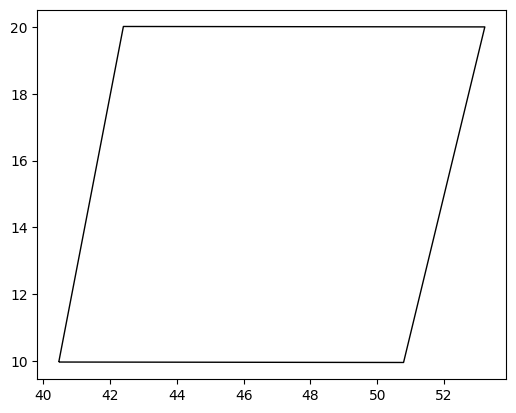

In [35]:
plt.close('all')
gpd.GeoDataFrame.from_features(items).plot(ec='k', fc='none')
plt.show()

In [36]:
items

In [ ]:
!git clone https://git.earthdata.nasa.gov/scm/lpdur/nasa-viirs.git

In [ ]:
!python

In [ ]:
%pip install h5py

In [51]:
import h5py

In [ ]:
!wget https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/VNP09GA.002/VNP09GA.A2023292.h22v07.002.2023293130701/VNP09GA.A2023292.h22v07.002.2023293130701.h5

In [54]:
f = h5py.File('VNP09GA.A2023292.h22v07.002.2023293130701.h5')

In [55]:
f.keys()

<KeysViewHDF5 ['HDFEOS', 'HDFEOS INFORMATION', 'SensorAzimuth_c', 'SensorZenith_c', 'SolarAzimuth_c', 'SolarZenith_c', 'SurfReflect_I1_c', 'SurfReflect_I2_c', 'SurfReflect_I3_c', 'SurfReflect_M10_c', 'SurfReflect_M11_c', 'SurfReflect_M1_c', 'SurfReflect_M2_c', 'SurfReflect_M3_c', 'SurfReflect_M4_c', 'SurfReflect_M5_c', 'SurfReflect_M7_c', 'SurfReflect_M8_c', 'SurfReflect_QF1_c', 'SurfReflect_QF2_c', 'SurfReflect_QF3_c', 'SurfReflect_QF4_c', 'SurfReflect_QF5_c', 'SurfReflect_QF6_c', 'SurfReflect_QF7_c', 'iobs_res_c', 'land_water_mask_c', 'nadd_obs_row_1km', 'nadd_obs_row_500m', 'obscov_1km_c', 'obscov_500m_c', 'orbit_pnt_c']>

In [113]:
f['nadd_obs_row_1km']

<HDF5 dataset "nadd_obs_row_1km": shape (1200,), type "<i4">

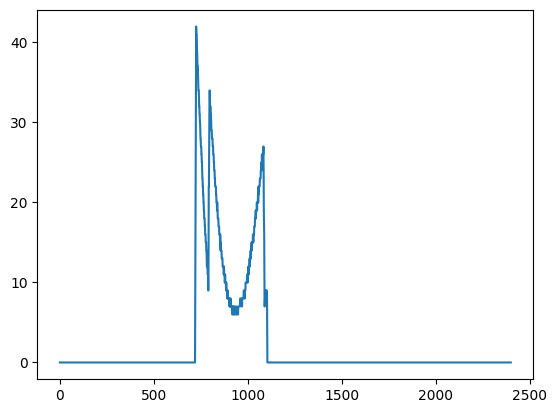

In [117]:
plt.plot(np.array(f['nadd_obs_row_500m']))
plt.show()

In [118]:
96427 / 211

457.0

In [107]:
x = np.array(f['SurfReflect_M11_c']).reshape(211, -1)

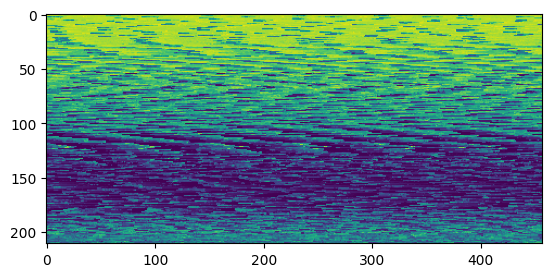

In [108]:
plt.imshow(x)
plt.show()

In [121]:
f['HDFEOS INFORMATION']['StructMetadata.0'][()].split()

[b'GROUP=SwathStructure',
 b'END_GROUP=SwathStructure',
 b'GROUP=GridStructure',
 b'GROUP=GRID_1',
 b'GridName="VIIRS_Grid_1km_2D"',
 b'XDim=1200',
 b'YDim=1200',
 b'UpperLeftPointMtrs=(4447802.078667,2223901.039333)',
 b'LowerRightMtrs=(5559752.598333,1111950.519667)',
 b'Projection=HE5_GCTP_SNSOID',
 b'ProjParams=(6371007.181000,0,0,0,0,0,0,0,0,0,0,0,0)',
 b'SphereCode=-1',
 b'GridOrigin=HE5_HDFE_GD_UL',
 b'GROUP=Dimension',
 b'OBJECT=Dimension_1',
 b'DimensionName="YDim"',
 b'Size=1200',
 b'END_OBJECT=Dimension_1',
 b'OBJECT=Dimension_2',
 b'DimensionName="XDim"',
 b'Size=1200',
 b'END_OBJECT=Dimension_2',
 b'OBJECT=Dimension_3',
 b'DimensionName="dimofone"',
 b'Size=1',
 b'END_OBJECT=Dimension_3',
 b'END_GROUP=Dimension',
 b'GROUP=DataField',
 b'OBJECT=DataField_1',
 b'DataFieldName="num_observations_1km"',
 b'DataType=H5T_NATIVE_SCHAR',
 b'DimList=("YDim","XDim")',
 b'MaxdimList=("YDim","XDim")',
 b'CompressionType=HE5_HDFE_COMP_DEFLATE',
 b'DeflateLevel=8',
 b'TilingDimensions=(3

---

https://nbviewer.org/github/pytroll/pytroll-examples/blob/main/satpy/satpy_rayleigh_iband_enhanced.ipynb

In [2]:
%pip install satpy --upgrade

  Using cached satpy-0.47.0-py2.py3-none-any.whl
  Attempting uninstall: satpy
    Found existing installation: satpy 0.9.0
    Uninstalling satpy-0.9.0:
      Successfully uninstalled satpy-0.9.0

[notice] A new release of pip is available: 23.3.1 -> 24.0
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [1]:
from satpy.scene import Scene
from satpy import find_files_and_readers

In [8]:
!cp VNP09GA.A2023292.h22v07.002.2023293130701.h5 test.h5

In [11]:
from glob import glob
glob("./test*h5")

['./test.h5']

In [14]:
scene = Scene(filenames=['/opt/notebooks/test.h5'], reader='viirs_sdr')

No filenames found for reader: viirs_sdr
Don't know how to open the following files: {'/opt/notebooks/test.h5'}


ValueError: No supported files found

In [ ]:
%pip install odc-stac -q

In [42]:
import odc.stac

In [ ]:
?odc.stac.load

In [ ]:
xx = odc.stac.load(
    items,
    crs='epsg:4326',
    resolution=1000,
)

In [49]:
stackstac.stack(items, assets=['data'], epsg=4326, resolution=100)

<xarray.DataArray 'stackstac-2339f8ee7a4551ba84d6f2db752d42af' (time: 1,
                                                                band: 1, y: 1,
                                                                x: 1)>
dask.array<fetch_raster_window, shape=(1, 1, 1, 1), dtype=float64, chunksize=(1, 1, 1, 1), chunktype=numpy.ndarray>
Coordinates:
  * time            (time) datetime64[ns] 2023-10-19
    id              (time) <U41 'VNP09GA.A2023292.h22v07.002.2023293130701'
  * band            (band) <U4 'data'
  * x               (x) float64 0.0
  * y               (y) float64 100.0
    end_datetime    <U24 '2023-10-19T23:59:59.000Z'
    start_datetime  <U24 '2023-10-19T00:00:00.000Z'
    title           <U53 'Download VNP09GA.A2023292.h22v07.002.2023293130701.h5'
    epsg            int64 4326
Attributes:
    spec:        RasterSpec(epsg=4326, bounds=(0, 0, 100, 100), resolutions_x...
    crs:         epsg:4326
    transform:   | 100.00, 0.00, 0.00|\n| 0.00,-100.00, 100.00|\n| 0.00, 0.00...
    resolution:  100

In [9]:
from rastervision.pipeline.file_system.utils import json_to_file, file_to_json
json_to_file(items.to_dict(), 'modis_items.json')

In [10]:
from pystac import ItemCollection
items = ItemCollection.from_file('modis_items.json')

In [ ]:
%pip install -q 'odc-stac[botocore]'

In [5]:
import odc.stac

In [6]:
odc.stac.load(items, crs='epsg:3857', resolution=500)

Aborting load due to failure while reading: https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MYD09GA.061/MYD09GA.A2023329.h24v04.061.2023331025647/MYD09GA.A2023329.h24v04.061.2023331025647.hdf:1


RasterioIOError: '/vsicurl/https://data.lpdaac.earthdatacloud.nasa.gov/lp-prod-protected/MYD09GA.061/MYD09GA.A2023329.h24v04.061.2023331025647/MYD09GA.A2023329.h24v04.061.2023331025647.hdf' not recognized as a supported file format.

In [8]:
crs_transformer = RasterioCRSTransformer(transform=data_array.transform, image_crs=data_array.crs)
bbox_pixel_coords = crs_transformer.map_to_pixel(bbox).normalize()
bbox_pixel_coords

Box(ymin=2179, xmin=1158, ymax=2213, xmax=1179)

In [13]:
items[0].properties

{'created': '2023-11-28T02:43:26Z',
 'updated': '2023-11-27T21:17:16.577000Z',
 'datetime': None,
 'platform': 'aqua',
 'proj:epsg': None,
 'proj:wkt2': 'PROJCS["unnamed",GEOGCS["Unknown datum based upon the custom spheroid",DATUM["Not specified (based on custom spheroid)",SPHEROID["Custom spheroid",6371007.181,0]],PRIMEM["Greenwich",0],UNIT["degree",0.0174532925199433,AUTHORITY["EPSG","9122"]]],PROJECTION["Sinusoidal"],PARAMETER["longitude_of_center",0],PARAMETER["false_easting",0],PARAMETER["false_northing",0],UNIT["Meter",1],AXIS["Easting",EAST],AXIS["Northing",NORTH]]',
 'proj:shape': [2400, 2400],
 'instruments': ['modis'],
 'end_datetime': '2023-11-24T23:59:59Z',
 'modis:tile-id': '51024004',
 'proj:geometry': {'type': 'Polygon',
  'coordinates': [[[7783653.637667, 4447802.078667],
    [7783653.637667, 5559752.598333],
    [6671703.118, 5559752.598333],
    [6671703.118, 4447802.078667],
    [7783653.637667, 4447802.078667]]]},
 'proj:transform': [463.3127165279169,
  0.0,
  6671